# BIA 810: FINAL PROJECT

## Analyzing Competitive Dynamics in the Injectable Anesthesia Market

### By Group 5 - Venkata Sandilya Bagavathula, Hardikaben Sanghani, WeiWei Tao and Hinali Maiyani


### Problem Statement:
The project examines why Midoride is struggling to outperform the older product, Ketotrom, and its effectiveness against competitors Fentirate and Profativ in the injectable anesthesia market. The objective is to strategize for boosting Midoride's market share.

### Business Solution: 
Increase Midoride's market share by leveraging Ketotrom's healthcare provider network, enhancing targeted marketing and educational efforts, and adapting strategies based on regional market dynamics and specific healthcare specialties.

### Business Impact: 
Reverse market share decline and boost Midoride's presence.
Improved competitive positioning leading to increased revenue and profitability.
Targeting high-value areas and the senior demographic is expected to drive growth.


### Loading all claims data files

In [63]:
import numpy as np
import pandas as pd



med_clm_data_1 = pd.read_excel("/Users/sandy/Desktop/BIA 810/Final Project/Data Files/Medicare_Claims_data_part_1.xlsx")
med_clm_data_2 = pd.read_excel("/Users/sandy/Desktop/BIA 810/Final Project/Data Files/Medicare_Claims_data_part_2.xlsx")
med_clm_data_3 = pd.read_excel("/Users/sandy/Desktop/BIA 810/Final Project/Data Files/Medicare_Claims_data_part_3.xlsx")
med_clm_data_4 = pd.read_excel("/Users/sandy/Desktop/BIA 810/Final Project/Data Files/Medicare_Claims_data_part_4.xlsx")
med_clm_data_5 = pd.read_excel("/Users/sandy/Desktop/BIA 810/Final Project/Data Files/Medicare_Claims_data_part_5.xlsx")



### Merging all the data together

In [64]:

merged_df = pd.concat([med_clm_data_1, med_clm_data_2, med_clm_data_3, med_clm_data_4, med_clm_data_5], ignore_index=True)

merged_df = merged_df.sort_values(by=['cur_clm_uniq_id'])

# Reset index
merged_df = merged_df.reset_index(drop=True)

print(merged_df)

        cur_clm_uniq_id  bene_mbi_id  fac_prvdr_npi_num clm_from_dt  \
0                100020        10449       7.829223e+09  2016-09-26   
1                100020        10977       7.360579e+09  2017-12-13   
2                100020         1109       1.587946e+09  2017-05-19   
3                100020        10882       1.414857e+09  2017-04-03   
4                100020          963       1.414857e+09  2018-11-03   
...                 ...          ...                ...         ...   
999995          1699222        11825       1.907625e+09  2018-07-11   
999996          1699222        12706       9.487650e+09  2016-04-08   
999997          1699222         1162       2.540069e+09  2018-06-30   
999998          1699222        10053       6.514841e+09  2018-10-30   
999999          1699222        10233       8.063718e+09  2018-10-08   

       clm_thru_dt prncpl_dgns_cd  clm_pmt_amt  clm_mdcr_instnl_tot_chrg_amt  \
0       2016-12-05          Z0289          NaN                     

### Filtering the required product codes

In [65]:
conditions = (
    (merged_df['clm_line_hcpcs_cd'] == "J1885") |
    (merged_df['clm_line_hcpcs_cd'] == "J3010") |
    (merged_df['clm_line_hcpcs_cd'] == "J2250") |
    (merged_df['clm_line_hcpcs_cd'] == "J2704")
)

filtered_df = merged_df[conditions]

filtered_df.head()



,cur_clm_uniq_id,bene_mbi_id,fac_prvdr_npi_num,clm_from_dt,clm_thru_dt,prncpl_dgns_cd,clm_pmt_amt,clm_mdcr_instnl_tot_chrg_amt,clm_line_num,clm_line_hcpcs_cd,clm_line_cvrd_pd_amt,clm_val_sqnc_num_dgns,clm_dgns_cd,clm_val_sqnc_num_prcdr,clm_prcdr_cd,clm_line_alowd_chrg_amt,clm_prvdr_spclty_cd
34,100020,10364,1.304896e+09,2016-12-27,2016-12-10,Z5181,NaN,NaN,3.0,J3010,66.14,NaN,I10,NaN,NaN,93.51,34
302,100020,12749,3.156424e+09,2016-11-07,2017-01-25,Z79899,73.75,718.425135,3.0,J1885,NaN,4.0,I10,NaN,NaN,NaN,NaN
309,100020,10055,1.866101e+09,2017-10-19,2018-01-01,H9313,NaN,NaN,1.0,J1885,1.23,NaN,I10,NaN,NaN,9.80,69
319,100020,12564,7.009227e+09,2016-11-17,2016-09-22,E041,111.07,558.601045,NaN,J1885,6.59,1.0,M79602,NaN,NaN,NaN,NaN
353,100020,10181,9.545956e+09,2017-02-23,2017-01-03,I10,NaN,NaN,4.0,J1885,1.40,NaN,I10,NaN,NaN,11.81,8


In [66]:
unique_claim_ids = filtered_df['cur_clm_uniq_id'].unique()

final_df = merged_df[merged_df['cur_clm_uniq_id'].isin(unique_claim_ids)]
print(final_df)

        cur_clm_uniq_id  bene_mbi_id  fac_prvdr_npi_num clm_from_dt  \
0                100020        10449       7.829223e+09  2016-09-26   
1                100020        10977       7.360579e+09  2017-12-13   
2                100020         1109       1.587946e+09  2017-05-19   
3                100020        10882       1.414857e+09  2017-04-03   
4                100020          963       1.414857e+09  2018-11-03   
...                 ...          ...                ...         ...   
999995          1699222        11825       1.907625e+09  2018-07-11   
999996          1699222        12706       9.487650e+09  2016-04-08   
999997          1699222         1162       2.540069e+09  2018-06-30   
999998          1699222        10053       6.514841e+09  2018-10-30   
999999          1699222        10233       8.063718e+09  2018-10-08   

       clm_thru_dt prncpl_dgns_cd  clm_pmt_amt  clm_mdcr_instnl_tot_chrg_amt  \
0       2016-12-05          Z0289          NaN                     

In [67]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28368 entries, 0 to 999999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   cur_clm_uniq_id               28368 non-null  int64         
 1   bene_mbi_id                   28368 non-null  int64         
 2   fac_prvdr_npi_num             28368 non-null  float64       
 3   clm_from_dt                   28368 non-null  datetime64[ns]
 4   clm_thru_dt                   28368 non-null  datetime64[ns]
 5   prncpl_dgns_cd                28365 non-null  object        
 6   clm_pmt_amt                   14352 non-null  float64       
 7   clm_mdcr_instnl_tot_chrg_amt  14639 non-null  float64       
 8   clm_line_num                  26730 non-null  float64       
 9   clm_line_hcpcs_cd             28269 non-null  object        
 10  clm_line_cvrd_pd_amt          26595 non-null  float64       
 11  clm_val_sqnc_num_dgns      

In [68]:
X = final_df['clm_line_hcpcs_cd'] == 'J1885'
count_J1885 = X.sum()
print(f"Number of records with 'J1885': {count_J1885}")


Number of records with 'J1885': 10152


In [69]:
Y = final_df['clm_line_hcpcs_cd'] == 'J2250'
count_J2250 = Y.sum()
print(f"Number of records with 'J2250': {count_J2250}")

Number of records with 'J2250': 1148


In [70]:
Z = final_df['clm_line_hcpcs_cd'] == 'J3010'
count_J3010 = Z.sum()
print(f"Number of records with 'J3010': {count_J3010}")

Number of records with 'J3010': 3264


In [71]:
A = final_df['clm_line_hcpcs_cd'] == 'J2704'
count_J2704 = A.sum()
print(f"Number of records with 'J2704': {count_J2704}")

Number of records with 'J2704': 704


In [72]:
med_clm_df = final_df[['cur_clm_uniq_id','bene_mbi_id','fac_prvdr_npi_num','clm_from_dt','clm_dgns_cd','clm_line_hcpcs_cd']]
med_clm_df

,cur_clm_uniq_id,bene_mbi_id,fac_prvdr_npi_num,clm_from_dt,clm_dgns_cd,clm_line_hcpcs_cd
0,100020,10449,7.829223e+09,2016-09-26,I10,88307
1,100020,10977,7.360579e+09,2017-12-13,I10,Q0092
2,100020,1109,1.587946e+09,2017-05-19,I4891,86141
3,100020,10882,1.414857e+09,2017-04-03,I10,93296
4,100020,963,1.414857e+09,2018-11-03,I10,99152
...,...,...,...,...,...,...
999995,1699222,11825,1.907625e+09,2018-07-11,I10,G0300
999996,1699222,12706,9.487650e+09,2016-04-08,Z87891,36415
999997,1699222,1162,2.540069e+09,2018-06-30,I10,84439
999998,1699222,10053,6.514841e+09,2018-10-30,I10,85027


In [73]:
#check and remove duplicates
med_clm_df.drop_duplicates()

,cur_clm_uniq_id,bene_mbi_id,fac_prvdr_npi_num,clm_from_dt,clm_dgns_cd,clm_line_hcpcs_cd
0,100020,10449,7.829223e+09,2016-09-26,I10,88307
1,100020,10977,7.360579e+09,2017-12-13,I10,Q0092
2,100020,1109,1.587946e+09,2017-05-19,I4891,86141
3,100020,10882,1.414857e+09,2017-04-03,I10,93296
4,100020,963,1.414857e+09,2018-11-03,I10,99152
...,...,...,...,...,...,...
999995,1699222,11825,1.907625e+09,2018-07-11,I10,G0300
999996,1699222,12706,9.487650e+09,2016-04-08,Z87891,36415
999997,1699222,1162,2.540069e+09,2018-06-30,I10,84439
999998,1699222,10053,6.514841e+09,2018-10-30,I10,85027


In [74]:
#rename columns
med_clm_df = med_clm_df.rename(columns=
{
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'Patient_id',
        'fac_prvdr_npi_num': 'npi_id',
        'clm_from_dt': 'claim_date',
        'clm_dgns_cd': 'diagnosis_code',
        'clm_line_hcpcs_cd':'product_code'
}                              
)

med_clm_df['claim_id'].nunique()

15145

### Claims data

In [75]:
med_clm_df

,claim_id,Patient_id,npi_id,claim_date,diagnosis_code,product_code
0,100020,10449,7.829223e+09,2016-09-26,I10,88307
1,100020,10977,7.360579e+09,2017-12-13,I10,Q0092
2,100020,1109,1.587946e+09,2017-05-19,I4891,86141
3,100020,10882,1.414857e+09,2017-04-03,I10,93296
4,100020,963,1.414857e+09,2018-11-03,I10,99152
...,...,...,...,...,...,...
999995,1699222,11825,1.907625e+09,2018-07-11,I10,G0300
999996,1699222,12706,9.487650e+09,2016-04-08,Z87891,36415
999997,1699222,1162,2.540069e+09,2018-06-30,I10,84439
999998,1699222,10053,6.514841e+09,2018-10-30,I10,85027


### Loading patient demographics data

In [76]:
pt_dem_df = pd.read_excel("/Users/sandy/Desktop/BIA 810/Final Project/Data Files/Patient_demographics_data.xlsx")
pt_dem_df.head()

,Patient_id,Age,Gender
0,10,71,Male
1,11,56,Male
2,12,65,Female
3,13,72,Female
4,14,77,Female


### Joining patient demographics data to claims data based on Patient ID

In [77]:
med_clm_pt_df = pd.merge(
    med_clm_df,
    pt_dem_df,
    on='Patient_id', how = 'left'
)
med_clm_pt_df = med_clm_pt_df.rename(columns={'Age': 'Patient Age'})
med_clm_pt_df

,claim_id,Patient_id,npi_id,claim_date,diagnosis_code,product_code,Patient Age,Gender
0,100020,10449,7.829223e+09,2016-09-26,I10,88307,76,Male
1,100020,10977,7.360579e+09,2017-12-13,I10,Q0092,86,Female
2,100020,1109,1.587946e+09,2017-05-19,I4891,86141,78,Female
3,100020,10882,1.414857e+09,2017-04-03,I10,93296,60,Male
4,100020,963,1.414857e+09,2018-11-03,I10,99152,72,Male
...,...,...,...,...,...,...,...,...
28363,1699222,11825,1.907625e+09,2018-07-11,I10,G0300,70,Female
28364,1699222,12706,9.487650e+09,2016-04-08,Z87891,36415,90,Female
28365,1699222,1162,2.540069e+09,2018-06-30,I10,84439,22,Male
28366,1699222,10053,6.514841e+09,2018-10-30,I10,85027,64,Female


### Loading HCP demographics data

In [78]:
hcp_dem_df = pd.read_excel("/Users/sandy/Desktop/BIA 810/Final Project/Data Files/HCP_demographics_data.xlsx")
hcp_dem_df.head()

,HCP NPI ID,Address,City,State,ZIP Code,Specialty
0,8386928704,322 Roberts Drive Suite 888,South Shannonton,AS,67431,Neurology
1,3688956922,11734 Deanna Groves Suite 031,Leviburgh,OK,12405,Anesthesiology
2,5134290518,18686 Schwartz Streets,Shepherdstad,RI,97054,Neurology
3,6740392080,410 Woodard Drive Suite 766,East Calvinmouth,MA,92138,Gastroenterology
4,1178012810,83203 Jimenez Village Apt. 548,Griffinchester,WY,48202,Anesthesiology


### Function for Zip code to make it into standard 5-digit format (HCP data)

In [79]:
hcp_dem_df = hcp_dem_df.rename(columns=
{
        'HCP NPI ID': 'npi_id',
        'ZIP Code': 'Zip Code'
}                              
)
hcp_dem_df.head()

hcp_dem_df['Zip Code'] = hcp_dem_df['Zip Code'].astype(str)

# Function to adjust the zip codes
def adjust_zip(zip_code):
    if len(zip_code) < 5:
        return '0' * (5 - len(zip_code)) + zip_code
    else:
        return zip_code

# Applying the function to the 'Zip Code' column
hcp_dem_df['Zip Code'] = hcp_dem_df['Zip Code'].apply(adjust_zip)
hcp_dem_df.head()

,npi_id,Address,City,State,Zip Code,Specialty
0,8386928704,322 Roberts Drive Suite 888,South Shannonton,AS,67431,Neurology
1,3688956922,11734 Deanna Groves Suite 031,Leviburgh,OK,12405,Anesthesiology
2,5134290518,18686 Schwartz Streets,Shepherdstad,RI,97054,Neurology
3,6740392080,410 Woodard Drive Suite 766,East Calvinmouth,MA,92138,Gastroenterology
4,1178012810,83203 Jimenez Village Apt. 548,Griffinchester,WY,48202,Anesthesiology


### Loading Zip to Territory Mapping data 

In [80]:
# Read the CSV file into a DataFrame
zip_df = pd.read_excel("/Users/sandy/Desktop/BIA 810/Final Project/Data Files/Zip_to_Territory_Mapping.xlsx")
zip_df


,Zip Code,Territory Name,Region Name
0,s,"Albany, NY",Northeast
1,30003,"Albany, NY",Northeast
2,30004,"Albany, NY",Northeast
3,30005,"Albany, NY",Northeast
4,30006,"Albany, NY",Northeast
...,...,...,...
41678,96693,"Washington, D.C.",Northeast
41679,96694,"Washington, D.C.",Northeast
41680,96695,"Washington, D.C.",Northeast
41681,96696,"Washington, D.C.",Northeast


### Function for its Zip code to make it into standard 5-digit format

In [81]:
# Convert 'Zip Code' column to string type
zip_df['Zip Code'] = zip_df['Zip Code'].astype(str)

# Function to adjust the zip codes
def adjust_zip(zip_code):
    if len(zip_code) < 5:
        return '0' * (5 - len(zip_code)) + zip_code
    else:
        return zip_code

# Applying the function to the 'Zip Code' column
zip_df['Zip Code'] = zip_df['Zip Code'].apply(adjust_zip)

# Display the modified DataFrame
print(zip_df.head())

  Zip Code Territory Name Region Name
0    0000s     Albany, NY   Northeast
1    30003     Albany, NY   Northeast
2    30004     Albany, NY   Northeast
3    30005     Albany, NY   Northeast
4    30006     Albany, NY   Northeast


### Joining HCP data and Zip to Territory Mapping data based on Zip code

In [82]:
hcp_dem_zip_df = pd.merge(
    hcp_dem_df,
    zip_df,
    on='Zip Code', how = 'left'
)
hcp_dem_zip_df



,npi_id,Address,City,State,Zip Code,Specialty,Territory Name,Region Name
0,8386928704,322 Roberts Drive Suite 888,South Shannonton,AS,67431,Neurology,"LA-San Diego, CA",West
1,3688956922,11734 Deanna Groves Suite 031,Leviburgh,OK,12405,Anesthesiology,"Atlanta, GA",Southeast
2,5134290518,18686 Schwartz Streets,Shepherdstad,RI,97054,Neurology,"Seattle, WA",West
3,6740392080,410 Woodard Drive Suite 766,East Calvinmouth,MA,92138,Gastroenterology,"Denver, CO",West
4,1178012810,83203 Jimenez Village Apt. 548,Griffinchester,WY,48202,Anesthesiology,"Detroit, MI",Northeast
...,...,...,...,...,...,...,...,...
1995,7648402660,1207 Olivia Via,Phillipfort,UT,81154,Anesthesiology,"LA-San Diego, CA",West
1996,5530159315,86116 Mathews Track Suite 253,Port Scott,TN,07721,Gastroenterology,"St Louis, MO",Midwest
1997,2202122399,070 Monica Loop,Haydenmouth,MD,98386,Cardiology,"Seattle, WA",West
1998,6175046381,5842 George Roads Suite 456,Changchester,GA,98013,Gastroenterology,"Seattle, WA",West


In [21]:
#hcp_dem_zip_df.info()

### Joining Claims data and HCP data based on NPI Id

In [83]:
med_clm_pt_hcp_df = pd.merge(
    med_clm_pt_df,
    hcp_dem_zip_df,
    on='npi_id', how = 'left'
)
med_clm_pt_hcp_df.head()



,claim_id,Patient_id,npi_id,claim_date,diagnosis_code,product_code,Patient Age,Gender,Address,City,State,Zip Code,Specialty,Territory Name,Region Name
0,100020,10449,7.829223e+09,2016-09-26,I10,88307,76,Male,224 Teresa Mills Suite 159,Campbellmouth,MS,09277,Gastroenterology,"Washington, D.C.",Northeast
1,100020,10977,7.360579e+09,2017-12-13,I10,Q0092,86,Female,1559 Sarah Springs Suite 587,North Jessicaborough,WI,63021,Orthopedics,"New York, NY",Northeast
2,100020,1109,1.587946e+09,2017-05-19,I4891,86141,78,Female,8979 Mason Common Suite 166,South Jennifershire,CO,78837,Orthopedics,"Charlotte, NC",Southeast
3,100020,10882,1.414857e+09,2017-04-03,I10,93296,60,Male,8562 Reynolds Motorway Apt. 414,Amandamouth,AS,97291,Neurology,"Seattle, WA",West
4,100020,963,1.414857e+09,2018-11-03,I10,99152,72,Male,8562 Reynolds Motorway Apt. 414,Amandamouth,AS,97291,Neurology,"Seattle, WA",West


In [84]:
B = med_clm_pt_hcp_df['product_code'] == 'J1885'
count_J1885 = B.sum()
print(f"Number of records with 'J1885': {count_J1885}")

Number of records with 'J1885': 10152


### Loading Diagnosis Code Mapping data

In [85]:
dig_cod_df = pd.read_excel('/Users/sandy/Desktop/BIA 810/Final Project/Data Files/Diagnosis_Code_Mapping.xlsx')
dig_cod_df.head()

,Diagnosis Code Market,Specialty
0,A,Infectious and Parasitic Diseases
1,B,Infectious and Parasitic Diseases
2,C,Neoplasms
3,D,"Neoplasms, Blood, Blood-forming Organs"
4,E,"Endocrine, Nutritional, Metabolic"


In [86]:
dig_cod_df = dig_cod_df.rename(columns=
{
        'Diagnosis Code Market': 'diagnosis_code_initials'
}                              
)
#Renaming "Diagnosis Code Market" as "diagnosis_code_initials"

dig_cod_df.head()

,diagnosis_code_initials,Specialty
0,A,Infectious and Parasitic Diseases
1,B,Infectious and Parasitic Diseases
2,C,Neoplasms
3,D,"Neoplasms, Blood, Blood-forming Organs"
4,E,"Endocrine, Nutritional, Metabolic"


In [87]:
med_clm_pt_hcp_df['diagnosis_code_initials'] = med_clm_pt_hcp_df['diagnosis_code'].str[0]
med_clm_pt_hcp_df.head()

,claim_id,Patient_id,npi_id,claim_date,diagnosis_code,product_code,Patient Age,Gender,Address,City,State,Zip Code,Specialty,Territory Name,Region Name,diagnosis_code_initials
0,100020,10449,7.829223e+09,2016-09-26,I10,88307,76,Male,224 Teresa Mills Suite 159,Campbellmouth,MS,09277,Gastroenterology,"Washington, D.C.",Northeast,I
1,100020,10977,7.360579e+09,2017-12-13,I10,Q0092,86,Female,1559 Sarah Springs Suite 587,North Jessicaborough,WI,63021,Orthopedics,"New York, NY",Northeast,I
2,100020,1109,1.587946e+09,2017-05-19,I4891,86141,78,Female,8979 Mason Common Suite 166,South Jennifershire,CO,78837,Orthopedics,"Charlotte, NC",Southeast,I
3,100020,10882,1.414857e+09,2017-04-03,I10,93296,60,Male,8562 Reynolds Motorway Apt. 414,Amandamouth,AS,97291,Neurology,"Seattle, WA",West,I
4,100020,963,1.414857e+09,2018-11-03,I10,99152,72,Male,8562 Reynolds Motorway Apt. 414,Amandamouth,AS,97291,Neurology,"Seattle, WA",West,I


### Joining "Claims data and HCP data" with "Diagnosis code mapping data" based on "diagnosis_code_initials"

In [88]:
main_data = pd.merge(
    med_clm_pt_hcp_df,
    dig_cod_df,
    on='diagnosis_code_initials', how = 'left'
)
main_data.head()

,claim_id,Patient_id,npi_id,claim_date,diagnosis_code,product_code,Patient Age,Gender,Address,City,State,Zip Code,Specialty_x,Territory Name,Region Name,diagnosis_code_initials,Specialty_y
0,100020,10449,7.829223e+09,2016-09-26,I10,88307,76,Male,224 Teresa Mills Suite 159,Campbellmouth,MS,09277,Gastroenterology,"Washington, D.C.",Northeast,I,Circulatory System
1,100020,10977,7.360579e+09,2017-12-13,I10,Q0092,86,Female,1559 Sarah Springs Suite 587,North Jessicaborough,WI,63021,Orthopedics,"New York, NY",Northeast,I,Circulatory System
2,100020,1109,1.587946e+09,2017-05-19,I4891,86141,78,Female,8979 Mason Common Suite 166,South Jennifershire,CO,78837,Orthopedics,"Charlotte, NC",Southeast,I,Circulatory System
3,100020,10882,1.414857e+09,2017-04-03,I10,93296,60,Male,8562 Reynolds Motorway Apt. 414,Amandamouth,AS,97291,Neurology,"Seattle, WA",West,I,Circulatory System
4,100020,963,1.414857e+09,2018-11-03,I10,99152,72,Male,8562 Reynolds Motorway Apt. 414,Amandamouth,AS,97291,Neurology,"Seattle, WA",West,I,Circulatory System


In [89]:
main_data = main_data.rename(columns={
    'Specialty_x': 'HCP Speciality',
    'Specialty_y': 'Diagnosis code Speciality'
})

main_data.head()

,claim_id,Patient_id,npi_id,claim_date,diagnosis_code,product_code,Patient Age,Gender,Address,City,State,Zip Code,HCP Speciality,Territory Name,Region Name,diagnosis_code_initials,Diagnosis code Speciality
0,100020,10449,7.829223e+09,2016-09-26,I10,88307,76,Male,224 Teresa Mills Suite 159,Campbellmouth,MS,09277,Gastroenterology,"Washington, D.C.",Northeast,I,Circulatory System
1,100020,10977,7.360579e+09,2017-12-13,I10,Q0092,86,Female,1559 Sarah Springs Suite 587,North Jessicaborough,WI,63021,Orthopedics,"New York, NY",Northeast,I,Circulatory System
2,100020,1109,1.587946e+09,2017-05-19,I4891,86141,78,Female,8979 Mason Common Suite 166,South Jennifershire,CO,78837,Orthopedics,"Charlotte, NC",Southeast,I,Circulatory System
3,100020,10882,1.414857e+09,2017-04-03,I10,93296,60,Male,8562 Reynolds Motorway Apt. 414,Amandamouth,AS,97291,Neurology,"Seattle, WA",West,I,Circulatory System
4,100020,963,1.414857e+09,2018-11-03,I10,99152,72,Male,8562 Reynolds Motorway Apt. 414,Amandamouth,AS,97291,Neurology,"Seattle, WA",West,I,Circulatory System


In [90]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28368 entries, 0 to 28367
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   claim_id                   28368 non-null  int64         
 1   Patient_id                 28368 non-null  int64         
 2   npi_id                     28368 non-null  float64       
 3   claim_date                 28368 non-null  datetime64[ns]
 4   diagnosis_code             28368 non-null  object        
 5   product_code               28269 non-null  object        
 6   Patient Age                28368 non-null  int64         
 7   Gender                     28368 non-null  object        
 8   Address                    28368 non-null  object        
 9   City                       28368 non-null  object        
 10  State                      28368 non-null  object        
 11  Zip Code                   28368 non-null  object        
 12  HCP 

In [91]:

num_unique_product_codes = main_data['product_code'].nunique()

print(f"Number of unique values in 'product_code': {num_unique_product_codes}")


Number of unique values in 'product_code': 1460


In [92]:

unique_product_codes = main_data['product_code'].unique()

print("Unique values in 'product_code':", unique_product_codes)


Unique values in 'product_code': [88307 'Q0092' 86141 ... 74250 'Q2035' 'C2003']


## Key Business Questions:
### 1. Market Dynamics and Competitive Landscape Assessment:
Perform a comprehensive analysis of the injectable anesthesia market for the years 2016 to 2018. Identify
and explain the trends in market share, growth rates, and other key indicators for Products 1, 2, 3, and 4.

How have these trends evolved over time, and what insights can be drawn from them? Compare and
contrast the performance of Products 1, 2, 3, and 4 in the market. What sets Product 3 apart as a
competitor that is rapidly gaining market share while Products 1 and 2 are struggling?


a. Calculate and analyze the share of claims, patients and the HCPs using the HCPCS/CPT
codes of these 4 products.


i. Expected outputs:
## 1. A 100% stacked bar graph showing claims percentage of each product per year, where one bar represents one year:

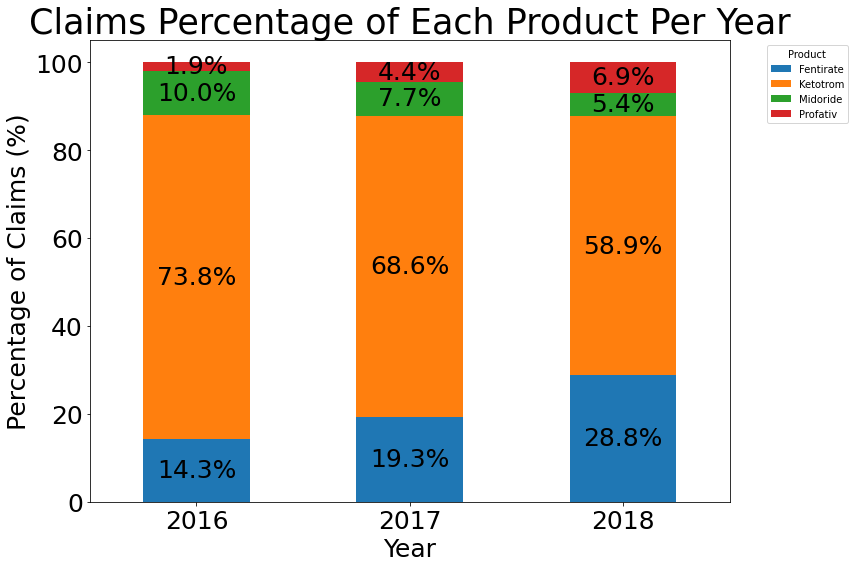

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'main_data' is your DataFrame
# Map the product codes to their names
product_code_to_name = {
    "J1885": "Ketotrom",
    "J2250": "Midoride",
    "J3010": "Fentirate",
    "J2704": "Profativ"
}
main_data['product_name'] = main_data['product_code'].map(product_code_to_name)

# Filter data for the years 2016 to 2018
main_data['claim_date'] = pd.to_datetime(main_data['claim_date'])
data_filtered = main_data[main_data['claim_date'].dt.year.isin([2016, 2017, 2018])]

# Group data by year and product name, then count the number of claims
data_grouped = data_filtered.groupby([data_filtered['claim_date'].dt.year, 'product_name']).size().unstack(fill_value=0)

# Calculate the percentage for each product per year for the 100% stacked bar graph
data_percentage = data_grouped.div(data_grouped.sum(axis=1), axis=0) * 100

# Plotting the 100% stacked bar graph
plt.figure(figsize=(12, 8))
data_percentage.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Claims Percentage of Each Product Per Year', fontsize=35)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Percentage of Claims (%)', fontsize=25)
plt.xticks(rotation=0, fontsize=25)
plt.yticks(fontsize=25)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate percentages on the bars
for n, x in enumerate([*data_percentage.index.values]):
    for (proportion, y_loc) in zip(data_percentage.loc[x], data_percentage.loc[x].cumsum()):
        plt.text(x=n, y=(y_loc - proportion) + (proportion / 2), s=f'{proportion:.1f}%', ha='center', va='center', fontsize=25)

plt.tight_layout()
plt.show()


In [95]:
data_filtered['claim_date']

0       2016-09-26
1       2017-12-13
2       2017-05-19
3       2017-04-03
4       2018-11-03
           ...    
28363   2018-07-11
28364   2016-04-08
28365   2018-06-30
28366   2018-10-30
28367   2018-10-08
Name: claim_date, Length: 28351, dtype: datetime64[ns]

### Observations from the Charts:

Ketotrom and Midoride show a consistent decline in claims percentage and number of patients over the years. There is a noticeable shift in market share over these years. Specifically, Fentirate shows a significant increase in its percentage of claims, indicating its growing dominance in the market. This trend may suggest that Fentirate is effectively capturing market share that could have been expected to go to Ketotrom and Midoride. Considering their established presence and the launch of the new variant. This trend highlights the competitive challenge posed by Fentirate and the need for strategic actions to regain market share for Products 1 and 2. 

## 2. A 100% stacked bar graph showing the number of patients of each product per year, where one bar represents one year.


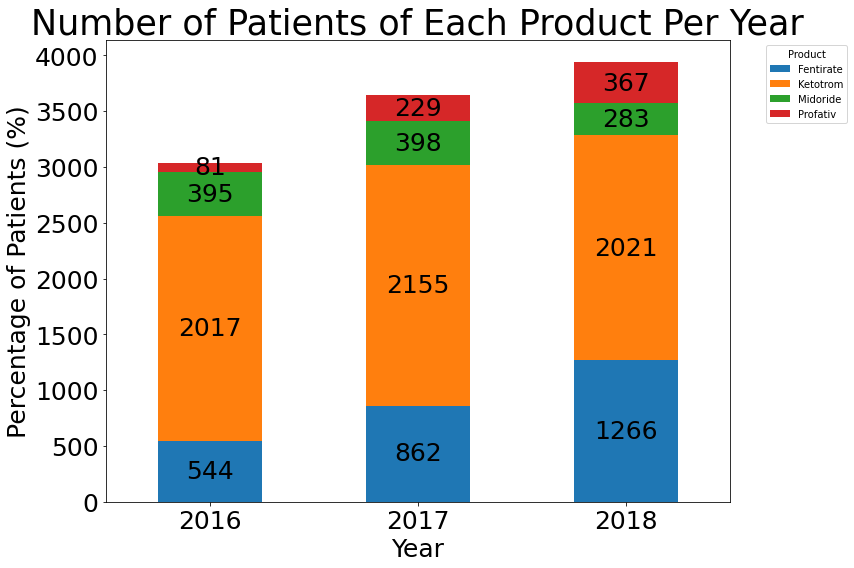

In [96]:
# Mapping product codes to product names
product_code_to_name = {
    "J1885": "Ketotrom",
    "J2250": "Midoride",
    "J3010": "Fentirate",
    "J2704": "Profativ"
}
main_data['product_name'] = main_data['product_code'].map(product_code_to_name)

# Convert claim_date to datetime and filter data for the years 2016 to 2018
# main_data['claim_date'] = pd.to_datetime(main_data['claim_date'])
# data_filtered = main_data[(main_data['claim_date'].dt.year >= 2016) & (main_data['claim_date'].dt.year <= 2018)]

# Group data by year and product name, then count the number of unique patients
patients_per_year_product = data_filtered.groupby([data_filtered['claim_date'].dt.year, 'product_name'])['Patient_id'].nunique().unstack(fill_value=0)

# Plotting the stacked bar graph
plt.figure(figsize=(12, 8))
ax = patients_per_year_product.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Number of Patients of Each Product Per Year', fontsize=35)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Percentage of Patients (%)', fontsize=25)
plt.xticks(rotation=0, fontsize=25)
plt.yticks(fontsize=25)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate numbers on bars
for bar in ax.containers:
    ax.bar_label(bar, label_type='center', fontsize=25)

plt.tight_layout()
plt.show()



### Obervation:
There is a clear trend of increasing patient numbers for Product 3 (J3010) across the years, indicating its growing popularity and market penetration. This trend is particularly concerning for Products 1 (J1885) and 2 (J2250), as the rise of Product 3 coincides with a relatively stagnant or modest growth in their patient numbers. This suggests that Product 3 might be attracting new patients or converting patients from other products, including Products 1 and 2. This observation underscores the urgency for strategic initiatives to enhance the attractiveness of Products 1 and 2 in the market, focusing on areas such as patient benefits, efficacy, or cost-effectiveness to regain and grow their patient base.

### Recommendation:

Develop and Implement a Targeted Marketing Campaign Focused on Differentiation and Value Proposition of Midoride:

Given the data, it's clear that Fentirate) is effectively appealing to the market, potentially due to perceived advantages or better marketing. To counter this, the company should initiate a targeted marketing campaign that focuses on the unique selling points of Midoride. This campaign should be data-driven and focus on areas where Midoride can be distinctly positioned against Fentirate.


## 3. A 100% stacked bar graph showing the number of HCPs (I.e., writers) writing claims for each product per year, where one bar represents one year

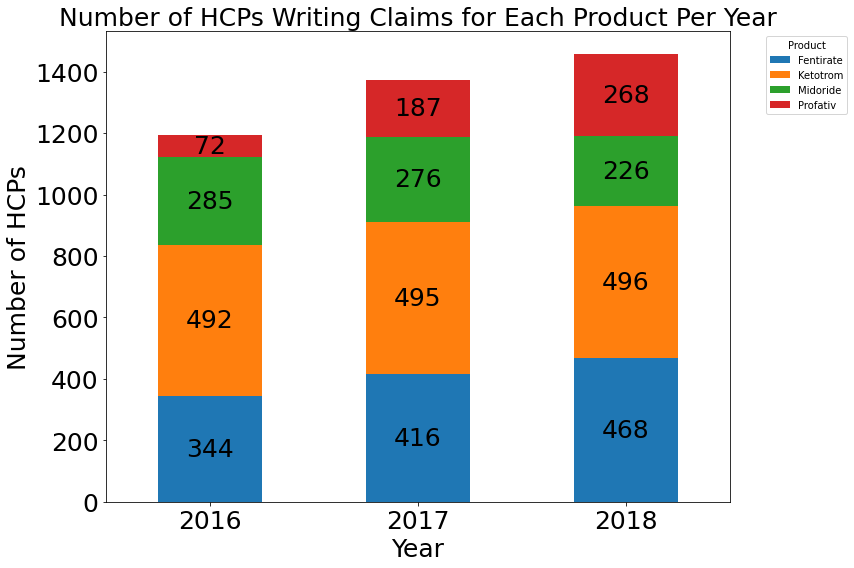

In [97]:


# Mapping product codes to product names
product_code_to_name = {
    "J1885": "Ketotrom",
    "J2250": "Midoride",
    "J3010": "Fentirate",
    "J2704": "Profativ"
}
main_data['product_name'] = main_data['product_code'].map(product_code_to_name)

# Convert claim_date to datetime and filter data for the years 2016 to 2018
# main_data['claim_date'] = pd.to_datetime(main_data['claim_date'])
# data_filtered = main_data[(main_data['claim_date'].dt.year >= 2016) & (main_data['claim_date'].dt.year <= 2018)]

# Group data by year and product name, then count the number of unique HCPs (writers)
hcp_per_year_product = data_filtered.groupby([data_filtered['claim_date'].dt.year, 'product_name'])['npi_id'].nunique().unstack(fill_value=0)

# Plotting the stacked bar graph
plt.figure(figsize=(12, 8))
ax = hcp_per_year_product.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Number of HCPs Writing Claims for Each Product Per Year', fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Number of HCPs', fontsize=25)
plt.xticks(rotation=0, fontsize=25)
plt.yticks(fontsize=25)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate numbers on bars
for bar in ax.containers:
    ax.bar_label(bar, label_type='center', fontsize=25)

plt.tight_layout()
plt.show()



### Observation:
There's a significant shift in the HCPs' preference for prescribing these drugs. A growing percentage of HCPs are prescribing Product 3, indicating its increasing acceptance in the medical community.

The number of HCPs writing claims for Product 3 (J3010) has shown a notable increase over the years, indicating its growing acceptance and usage among healthcare professionals. This contrasts with the relatively stable or less significant growth in the number of HCPs prescribing Products 1 (J1885) and 2 (J2250). This trend suggests that Product 3 is not only gaining traction with patients but also with the prescribers, which could be due to various factors such as perceived efficacy, safety profile, marketing efforts, or even pricing strategies. For the company owning Products 1 and 2, this highlights the need for targeted strategies to increase HCP engagement and advocacy for these products


### Recommendation: 

Initiate a Comprehensive HCP Engagement and Education Program for Product 2 (Midoride):

To counter the growing preference for Product 3 among HCPs, a focused initiative to engage and educate HCPs about the unique benefits and applications of Midoride is crucial. 

This program should aim to reinforce the value proposition of Midoride and address any knowledge gaps that might be influencing HCPs' prescribing decisions.

Key Elements of the Program:

•	Evidence-Based Marketing Materials: Develop and distribute comprehensive, evidence-based marketing materials to HCPs. These materials should include data from clinical trials, case studies, and real-world evidence demonstrating the efficacy and safety of Midoride.

•	Feedback Mechanism: Implement a feedback system to gather insights from HCPs about their experiences with Midoride. Use this feedback to continuously refine the product's value proposition and address any barriers to its adoption.


# 1 B. Calculate and analyze the number of claims per HCP (aka writer) and the number of patients per HCP for each product.

## 1. A line graph showing the number of claims per writer per year, where one line represents one product, and one set of vertical data points are for one year.

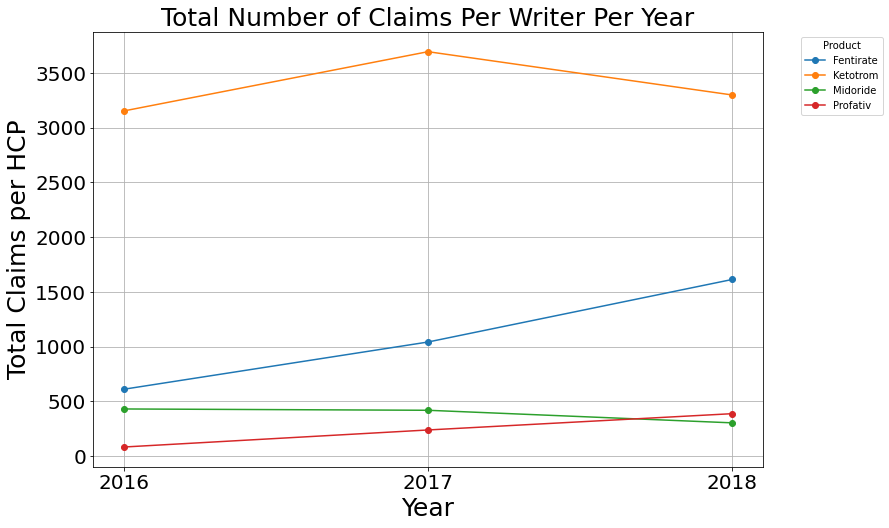

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data_filtered is already loaded
# Group data by year, product name, and HCP, then count the number of claims
claims_per_hcp = data_filtered.groupby([data_filtered['claim_date'].dt.year, 'product_name', 'npi_id'])['claim_id'].count().reset_index(name='total_claims')

# Sum the number of claims per HCP for each product per year
total_claims_per_hcp = claims_per_hcp.groupby(['claim_date', 'product_name']).agg({'total_claims': 'sum'}).reset_index()

# Pivot the data for plotting
total_claims_pivot = total_claims_per_hcp.pivot(index='claim_date', columns='product_name', values='total_claims')

# Plotting the line graph
plt.figure(figsize=(12, 8))
for product in total_claims_pivot.columns:
    plt.plot(total_claims_pivot.index, total_claims_pivot[product], marker='o', label=product)

plt.title('Total Number of Claims Per Writer Per Year', fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Total Claims per HCP', fontsize=25)

# Set the x-axis to show only 2016, 2017, and 2018
plt.xticks([2016, 2017, 2018], ['2016', '2017', '2018'], fontsize=20)
plt.yticks(fontsize=20)

plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()




## 2. A line graph showing the number of patients per writer per year, where one line represents one product, and one set of vertical data points are for one year.

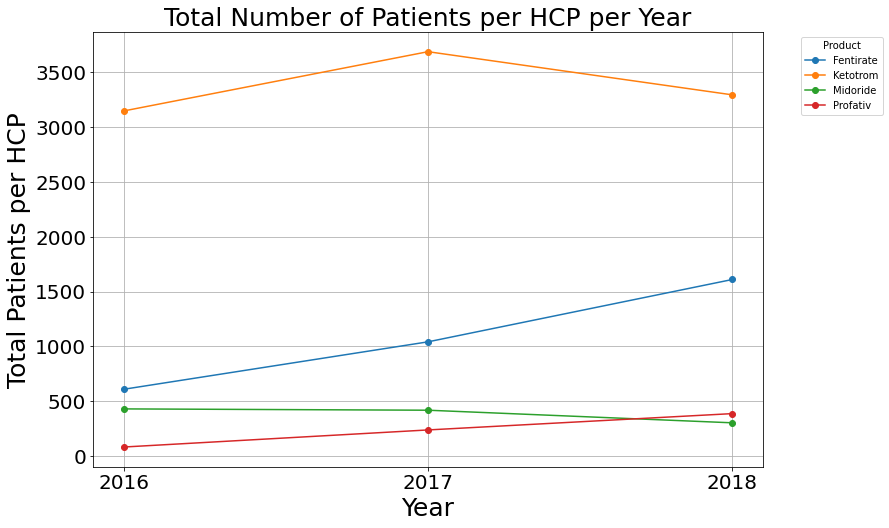

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data_filtered is already loaded
# Group data by year, product name, and HCP, then count the number of unique patients
patients_per_hcp = data_filtered.groupby([data_filtered['claim_date'].dt.year, 'product_name', 'npi_id'])['Patient_id'].nunique().reset_index(name='patients')

# Sum the number of patients per HCP for each product per year
total_patients_per_hcp = patients_per_hcp.groupby(['claim_date', 'product_name']).agg({'patients': 'sum'}).reset_index()

# Pivot the data for plotting
total_patients_pivot = total_patients_per_hcp.pivot(index='claim_date', columns='product_name', values='patients')

# Plotting the line graph
plt.figure(figsize=(12, 8))
for product in total_patients_pivot.columns:
    plt.plot(total_patients_pivot.index, total_patients_pivot[product], marker='o', label=product)

plt.title('Total Number of Patients per HCP per Year', fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Total Patients per HCP', fontsize=25)

# Set the x-axis to show only 2016, 2017, and 2018
plt.xticks([2016, 2017, 2018], ['2016', '2017', '2018'], fontsize=20)
plt.yticks(fontsize=20)

plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


### Observations:
A notable trend is observed in the efficiency of HCPs prescribing Product 3 (J3010), both in terms of claims and patients per writer. This product shows a higher number of claims and patients per HCP compared to Products 1 (J1885) and 2 (J2250). This suggests that HCPs prescribing Product 3 are not only more numerous but are also more actively engaged, managing a higher volume of patients and claims. For Products 1 and 2, this highlights an opportunity to focus on increasing HCP engagement and efficiency. Enhancing HCP support and providing tools or incentives to encourage a higher volume of patient management with these products could be beneficial in regaining market share.

### Recommendation:
Establish a feedback loop on Midoride with HCPs

## 1C Find the top 5 territories with the most drop in claims volume from year 2017 to 2018 for the variant brand and compare it with that of the competitor brand (Product 3 – J3010).

i. Find the territory-level claims volume per product per year.
ii. Calculate the year-over-year change % for the variant brand between 2017 and
2018.
iii. Sort the territories from smallest to largest value from above.
iv. Take the top 5 territories with the smallest value for year-over-year change %
(I.e., biggest drop in claims volume from 2017 - 2018) and extract the claims count
for the variant brand and the competitor brand for each year from 2016 – 2018
for these 5 Territories.


Expected outputs:
## 1. A clustered bar chart showing the number of claims from each of these 5 territories for each year from 2016 – 2018 for the variant brand, where one bar is for one Territory within each year and the bars for one year are clustered together.
## 2. A clustered bar chart showing the number of claims from each of these 5 territories for each year from 2016 – 2018 for the main competitor brand (J3010), where one bar is for one Territory within each year and the bars for one year are clustered together.

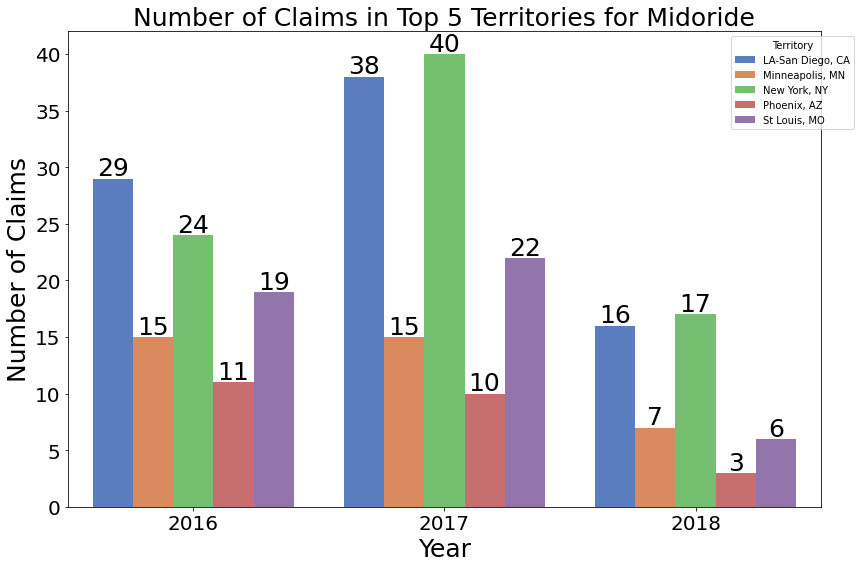

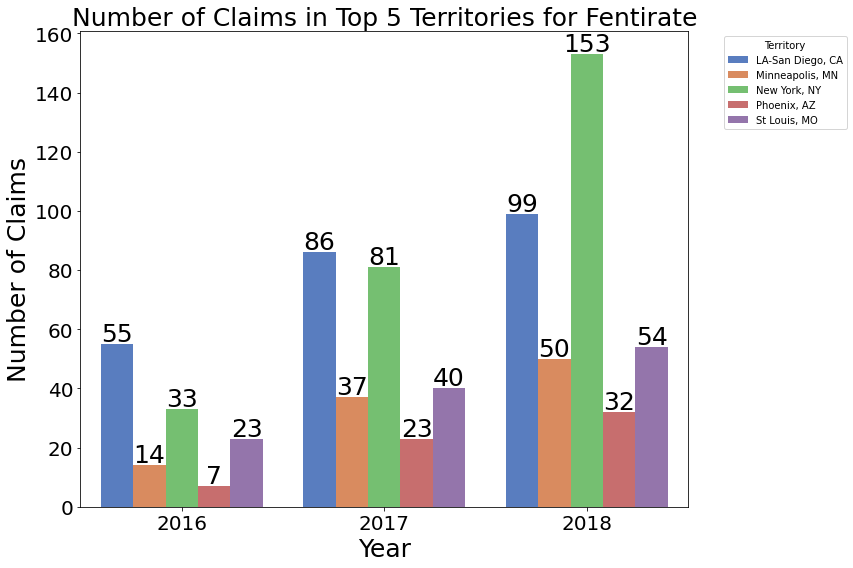

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'main_data' is your DataFrame
# Map the product codes to their names
product_code_to_name = {
    "J1885": "Ketotrom",
    "J2250": "Midoride",  # Variant brand
    "J3010": "Fentirate",  # Competitor brand
    "J2704": "Profativ"
}
main_data['product_name'] = main_data['product_code'].map(product_code_to_name)

# # Filter data for the years 2016 to 2018
# main_data['claim_date'] = pd.to_datetime(main_data['claim_date'])
# data_filtered = main_data[main_data['claim_date'].dt.year.isin([2016, 2017, 2018])]

# Find the territory-level claims volume per product per year
territory_claims = data_filtered.groupby(['Territory Name', 'product_name', data_filtered['claim_date'].dt.year])['claim_id'].count().reset_index()

# Filter for Midoride and Fentirate
territory_claims_filtered = territory_claims[territory_claims['product_name'].isin(['Midoride', 'Fentirate'])]

# Calculate the year-over-year change % for Midoride between 2017 and 2018
midoride_claims = territory_claims_filtered[territory_claims_filtered['product_name'] == 'Midoride']
midoride_pivot = midoride_claims.pivot(index='Territory Name', columns='claim_date', values='claim_id').fillna(0)
midoride_pivot['YoY_change'] = ((midoride_pivot[2018] - midoride_pivot[2017]) / midoride_pivot[2017]) * 100

# Sort territories and find top 5 with most drop
top_5_territories = midoride_pivot['YoY_change'].nsmallest(5).index

# Extract the claims count for Midoride and Fentirate for 2016-2018 in these territories
top_5_data = territory_claims_filtered[(territory_claims_filtered['Territory Name'].isin(top_5_territories)) & (territory_claims_filtered['claim_date'].isin([2016, 2017, 2018]))]

# Plotting for Midoride and Fentirate
for product in ['Midoride', 'Fentirate']:
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=top_5_data[top_5_data['product_name'] == product], x='claim_date', y='claim_id', hue='Territory Name', ci=None, palette='muted', estimator=sum)
    
    plt.title(f'Number of Claims in Top 5 Territories for {product}', fontsize=25)
    plt.xlabel('Year', fontsize=25)
    plt.ylabel('Number of Claims', fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(title='Territory', bbox_to_anchor=(1.05, 1))
    
    # Annotate bar values
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=25)
    
    plt.tight_layout()
    plt.show()


### Observation: 
There is a notable decrease in the number of claims for Midoride from 2017 to 2018 across all top 5 territories. The most significant drops are in St. Louis, MO, and Phoenix, AZ, followed by LA-San Diego.

There’s growth in claims in all the top 5 territories during the same period, with substantial increases particularly in New York, NY, and LA-San Diego, CA.

### Recommendation:

Implement a regional pricing strategy, offering Midoride at a slightly lower price in high-value territories like New York and Los Angeles-San Diego to regain market share from Fentirate while maintaining regular pricing.

Specifically, in high-value territories like New York and Los Angeles-San Diego, offer Midoride at a slightly reduced price compared to Fentirate, leveraging its cost-effectiveness as a competitive advantage. 

This approach aims to capture a larger market share in competitive markets and ensures profitability in less competitive regions.

Continuously monitor the impact of the differential pricing strategy on Midoride's market share in New York and Los Angeles-San Diego. Analyze the response from healthcare providers, insurers, and patients. Be prepared to adjust pricing levels if needed to maintain a competitive edge.



## 2 Identifying the trends of the Key Market Drivers of the Injectable Anesthesia Market:
You got to know from the Primary market research team that the Patient Age, Specialty of the patient
diagnosis, HCP Specialty and New prescriber growth are the key Market Drivers of the Injectable
anesthetics. Investigate these metrics and their trends. How could you leverage the trends of these key
market drivers to increase your market share for Product 2? How could these trends relate to the
competitor brand’s growth (Product 3) and your Variant brand’s decline (Product 2)?


### 2a. Identify the medical fields or the specialties of the diagnosed patients using the diagnosis codes and the Specialties of the HCPs prescribing these drugs using the specialty group of the HCPs within the injectable anesthesia market (all 4 brands together) for years 2016-2018.

Expected outputs:
1. A pie chart showing the percentage of claims that each diagnosis
specialty contributes. Extract the diagnosis code initial and map the
diagnosis specialty using the diagnosis code mapping dataset. Show only
the top 5 diagnosis specialties.
2. A horizontal line graph showing # of writers from each HCP specialty
group mapped using the HCP demographics dataset.

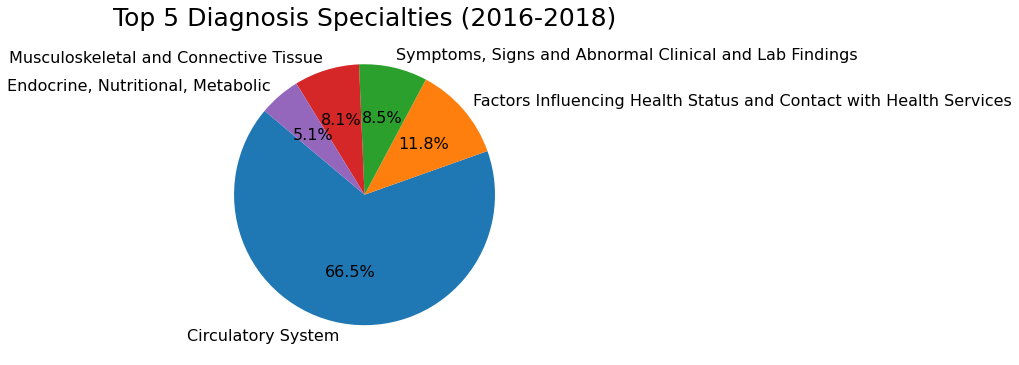

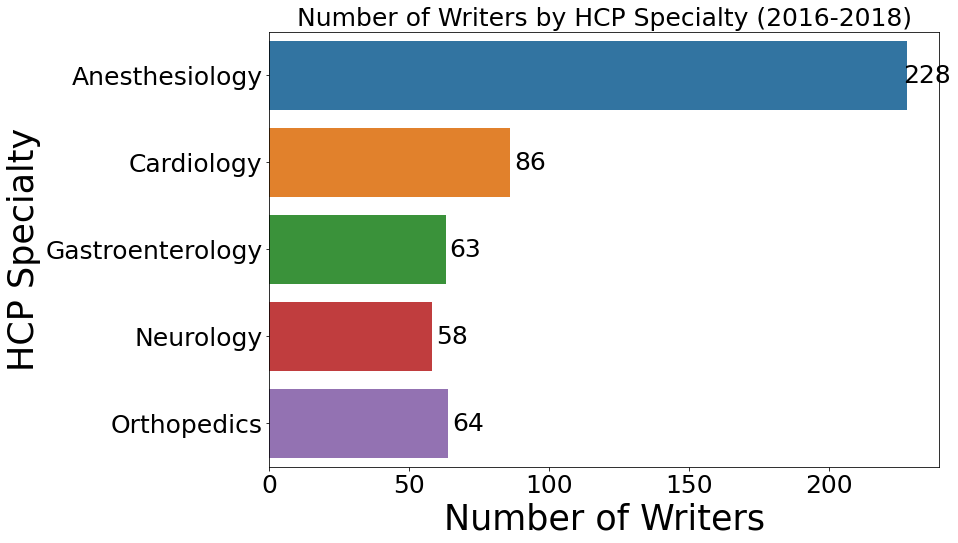

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for barplot

# Load the diagnosis code mapping and HCP demographics data
diagnosis_code_mapping_df = pd.read_excel('/Users/sandy/Desktop/BIA 810/Final Project/Data Files/Diagnosis_Code_Mapping.xlsx')
hcp_demographics_df = pd.read_excel('/Users/sandy/Desktop/BIA 810/Final Project/Data Files/HCP_demographics_data.xlsx')

# Map diagnosis codes to specialties
diagnosis_code_mapping = dict(zip(diagnosis_code_mapping_df['Diagnosis Code Market'], diagnosis_code_mapping_df['Specialty']))
main_data['Diagnosis Specialty'] = main_data['diagnosis_code_initials'].map(diagnosis_code_mapping)

# Filtering data for the years 2016 to 2018
data_filtered = main_data[main_data['claim_date'].dt.year.isin([2016, 2017, 2018])]

# Top 5 Diagnosis Specialties
top_5_diagnosis = data_filtered.groupby('Diagnosis Specialty')['claim_id'].count().nlargest(5)
plt.figure(figsize=(10, 6))
pie_chart = top_5_diagnosis.plot(kind='pie', autopct=lambda p: '{:.1f}%'.format(p), startangle=140, fontsize=16)
plt.title('Top 5 Diagnosis Specialties (2016-2018)', fontsize=25)
plt.ylabel('')

# Increase text size for percentage labels within the pie chart
for text in pie_chart.texts:
    text.set_fontsize(16)

plt.show()

# HCP Specialty Groups
hcp_specialty_counts = data_filtered.groupby('HCP Speciality')['npi_id'].nunique()
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=hcp_specialty_counts.index, x=hcp_specialty_counts.values)

# Annotate numbers on bars
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='center', va='center', 
                xytext=(20, 0), 
                textcoords='offset points', fontsize=25)

plt.title('Number of Writers by HCP Specialty (2016-2018)', fontsize=25)
plt.xlabel('Number of Writers', fontsize=35)
plt.ylabel('HCP Specialty', fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()


### Pie Chart Observation:
Circulatory System has significantly higher percentage in the top Diagnosis specialities. Health status-related factors and general symptoms also represent significant portions. Smaller segments are associated with musculoskeletal, connective tissue, and endocrine/metabolic conditions.

### Recommendation:
Educational materials & HCP-targeted resources for Musculoskeletal, Circulatory, Endocrine fields.


### Bar Chart Observation:
The majority of claims are associated with Circulatory System disorders
HCP Specialties: Anesthesiologists are the primary prescribers.

### Recommendation:
KOLs, who are influential and respected experts in specific therapeutic areas. They collaborate with KOLs to gain insights, gather feedback, and keep them informed about the latest research and developments.

Implement a specialized KOL engagement strategy tailored to anesthesiologists, focusing on providing them with exclusive access to in-depth clinical data, studies, and insights regarding the efficacy and safety of Midoride in pain management. This strategy aims to leverage the high number of anesthesiologists as writers to influence their prescribing decisions in favor of Midoride, given its potential benefits in pain management.



### 2B Find the trend of patient and claim distribution based on patient age within the injectable anesthesia market (all 4 brands together) for years 2016-2018.
i. Expected outputs:
1. A bar graph showing # patients from each age group using the following
age buckets:
a. 18-30, 31-40, 41-50, 51-60, 61-70, 71-80, 81+
2. A bar graph showing percentage of claims from all 4 brands using the
same age buckets as above.

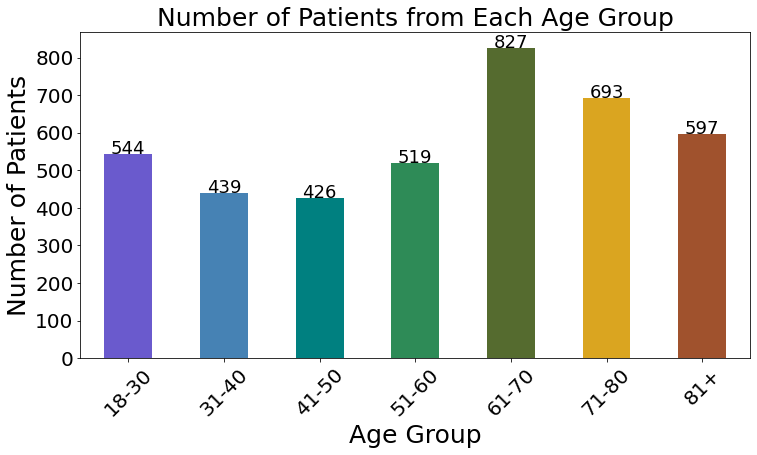

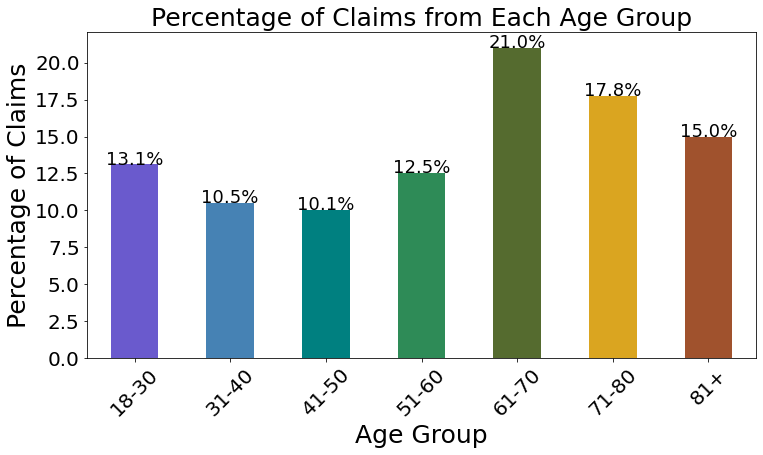

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming main_data is already loaded
# Defining age buckets and labels
age_buckets = [18, 31, 41, 51, 61, 71, 81, float('inf')]  # Adding an upper limit for 81+
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+']

# Creating the age group column in the main_data DataFrame
main_data['Age Group'] = pd.cut(main_data['Patient Age'], bins=age_buckets, right=False, labels=age_labels)

# 1. Calculating the number of patients in each age group
patient_age_distribution = main_data.groupby('Age Group')['Patient_id'].nunique()

# 2. Calculating the percentage of claims in each age group
claims_age_distribution = main_data.groupby('Age Group')['claim_id'].count() / main_data['claim_id'].count() * 100

# Subdued color palette
subdued_colors = ['#6A5ACD', '#4682B4', '#008080', '#2E8B57', '#556B2F', '#DAA520', '#A0522D']

# Plotting the bar graph for patient distribution with subdued colors
plt.figure(figsize=(12, 6))
ax1 = patient_age_distribution.plot(kind='bar', color=subdued_colors[:len(patient_age_distribution)])
plt.title('Number of Patients from Each Age Group',fontsize = 25)
plt.xlabel('Age Group',fontsize = 25)
plt.ylabel('Number of Patients',fontsize = 25)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)


# Adding value labels on each bar
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=18, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.show()

# Plotting the bar graph for claim distribution with subdued colors
plt.figure(figsize=(12, 6))
ax2 = claims_age_distribution.plot(kind='bar', color=subdued_colors[:len(claims_age_distribution)])
plt.title('Percentage of Claims from Each Age Group',fontsize = 25)
plt.xlabel('Age Group', fontsize = 25)
plt.ylabel('Percentage of Claims',fontsize = 25)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)

# Adding value labels on each bar
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=18, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.show()


### Observation:
The 18-30 age group has a higher percentage of claims than middle-aged groups, which could imply an untapped or growing market segment for anesthesia drugs.

### Recommendation:
To effectively advertise to senior individuals, initiate a multi-channel campaign that includes print advertising in senior-focused publications, direct mail outreach, strategically timed TV and radio commercials, and online ads targeting seniors on platforms like Facebook. Craft messaging that resonates with this age group, conveying empathy, simplicity, and clarity. Additionally, consider partnerships with healthcare professionals and participation in senior community events to maximize outreach and engagement within this demographic, ultimately boosting the visibility and success of your product or service.

In [109]:
main_data.head()

,claim_id,Patient_id,npi_id,claim_date,diagnosis_code,product_code,Patient Age,Gender,Address,City,State,Zip Code,HCP Speciality,Territory Name,Region Name,diagnosis_code_initials,Diagnosis code Speciality,product_name,Diagnosis Specialty,Age Group
0,100020,10449,7.829223e+09,2016-09-26,I10,88307,76,Male,224 Teresa Mills Suite 159,Campbellmouth,MS,09277,Gastroenterology,"Washington, D.C.",Northeast,I,Circulatory System,NaN,Circulatory System,71-80
1,100020,10977,7.360579e+09,2017-12-13,I10,Q0092,86,Female,1559 Sarah Springs Suite 587,North Jessicaborough,WI,63021,Orthopedics,"New York, NY",Northeast,I,Circulatory System,NaN,Circulatory System,81+
2,100020,1109,1.587946e+09,2017-05-19,I4891,86141,78,Female,8979 Mason Common Suite 166,South Jennifershire,CO,78837,Orthopedics,"Charlotte, NC",Southeast,I,Circulatory System,NaN,Circulatory System,71-80
3,100020,10882,1.414857e+09,2017-04-03,I10,93296,60,Male,8562 Reynolds Motorway Apt. 414,Amandamouth,AS,97291,Neurology,"Seattle, WA",West,I,Circulatory System,NaN,Circulatory System,51-60
4,100020,963,1.414857e+09,2018-11-03,I10,99152,72,Male,8562 Reynolds Motorway Apt. 414,Amandamouth,AS,97291,Neurology,"Seattle, WA",West,I,Circulatory System,NaN,Circulatory System,71-80


### 2C New and continuing writer (HCP) trends of the four brands. Identify the new HCPs writing for each of the brands based on the claim year from 2016 – 2018 and identify the continuing writers for each of the brands based on the claim year for 2017 and 2018.

i. Expected outputs:
1. A clustered bar chart showing # new writers for each brand from each
year, where one bar is for one brand, and the bars are grouped into each
year from 2016 – 2018. New Writer refers to the HCPs who prescribed
the brand for the first time between 2018 and 2018.
2. A line chart showing # of continuing writers for each brand for each year
between 2017 and 2018 where each line should belong to each brand.
The continuing writers are HCPs who continued to write the brand after
the first prescription in the following years.
Continuing Writers = Total Writers – New Writers. So, find the Total
writers in each year and each brand and subtract the corresponding new
writers to get the continuing writer count.
3. What do you observe from the charts above

In [117]:
filtered_df.head()

,cur_clm_uniq_id,bene_mbi_id,fac_prvdr_npi_num,clm_from_dt,clm_thru_dt,prncpl_dgns_cd,clm_pmt_amt,clm_mdcr_instnl_tot_chrg_amt,clm_line_num,clm_line_hcpcs_cd,clm_line_cvrd_pd_amt,clm_val_sqnc_num_dgns,clm_dgns_cd,clm_val_sqnc_num_prcdr,clm_prcdr_cd,clm_line_alowd_chrg_amt,clm_prvdr_spclty_cd
34,100020,10364,1.304896e+09,2016-12-27,2016-12-10,Z5181,NaN,NaN,3.0,J3010,66.14,NaN,I10,NaN,NaN,93.51,34
302,100020,12749,3.156424e+09,2016-11-07,2017-01-25,Z79899,73.75,718.425135,3.0,J1885,NaN,4.0,I10,NaN,NaN,NaN,NaN
309,100020,10055,1.866101e+09,2017-10-19,2018-01-01,H9313,NaN,NaN,1.0,J1885,1.23,NaN,I10,NaN,NaN,9.80,69
319,100020,12564,7.009227e+09,2016-11-17,2016-09-22,E041,111.07,558.601045,NaN,J1885,6.59,1.0,M79602,NaN,NaN,NaN,NaN
353,100020,10181,9.545956e+09,2017-02-23,2017-01-03,I10,NaN,NaN,4.0,J1885,1.40,NaN,I10,NaN,NaN,11.81,8


In [124]:
total_writers = main_data.pivot_table(
    index='claim_date',columns='product_code',
    values='npi_id',  # Using 'Patient_id' as values for aggregation
    aggfunc=pd.Series.nunique,  # Use nunique to count the number of unique patients
    fill_value=0)

/var/folders/lz/7nqb4lx96fq_6srflcnjch000000gn/T/ipykernel_1314/1823540911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['year'] = pd.to_datetime(data_filtered['claim_date']).dt.year
/var/folders/lz/7nqb4lx96fq_6srflcnjch000000gn/T/ipykernel_1314/1823540911.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Product'] = filtered_data['product_code'].map(product_mapping)


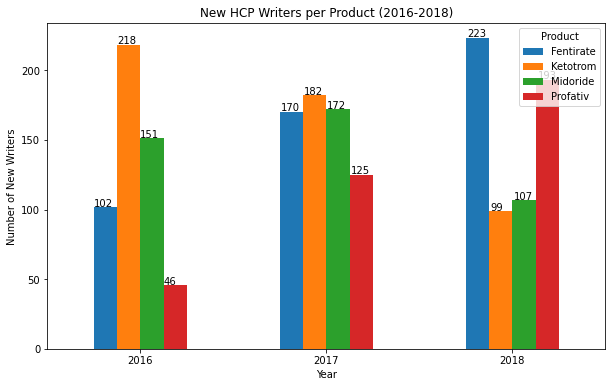

In [119]:
# Extract year from claim_date
data_filtered['year'] = pd.to_datetime(data_filtered['claim_date']).dt.year

# Convert 'claim_date' to datetime and extract year
main_data['Year'] = pd.to_datetime(main_data['claim_date']).dt.year

# Filter for years 2016 to 2018
filtered_data = main_data[main_data['Year'].isin([2016, 2017, 2018])]

# Updated mapping with specified product names
product_mapping = {
    'J1885': 'Ketotrom',
    'J2250': 'Midoride',
    'J3010': 'Fentirate',
    'J2704': 'Profativ'
}

# Apply the mapping to the 'product_code' column
filtered_data['Product'] = filtered_data['product_code'].map(product_mapping)

# Identify new writers for each product by year
new_writers = filtered_data.drop_duplicates(subset=['npi_id', 'Product']).groupby(['Year', 'Product']).size().unstack(fill_value=0)

# Plotting the results with values on top of each bar
ax = new_writers.plot(kind='bar', stacked=False, figsize=(10, 6), rot=0)

# Adding the values on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.title('New HCP Writers per Product (2016-2018)')
plt.xlabel('Year')
plt.ylabel('Number of New Writers')
plt.legend(title='Product')
plt.show()

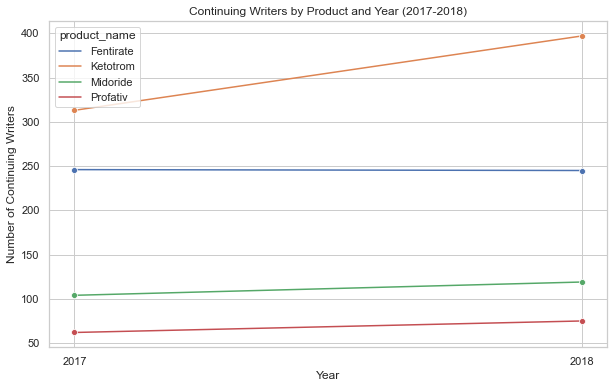

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming main_data is already loaded and is the DataFrame containing your data
# main_data = ...

# Convert 'claim_date' to datetime and extract the year
main_data['year'] = pd.to_datetime(main_data['claim_date']).dt.year

# Define a mapping from product codes to product names
product_names = {
    "J1885": "Ketotrom",
    "J2250": "Midoride",
    "J3010": "Fentirate",
    "J2704": "Profativ"
}

# Replace product codes with product names in the DataFrame
main_data['product_name'] = main_data['product_code'].map(product_names)

# Filter for the years 2017 and 2018
data_filtered = main_data[main_data['year'].isin([2017, 2018])]

# Mapping the new_writers data to the product names
new_writers_data = {
    "Ketotrom": {"2017": 182, "2018": 99},
    "Midoride": {"2017": 172, "2018": 107},
    "Fentirate": {"2017": 170, "2018": 223},
    "Profativ": {"2017": 125, "2018": 193}
}

# Calculate the total writers for each product and each year
total_writers = data_filtered.groupby(['product_name', 'year'])['npi_id'].nunique().reset_index()
total_writers.rename(columns={'npi_id': 'total_writers'}, inplace=True)

# Calculate the continuing writers
continuing_writers = []
for _, row in total_writers.iterrows():
    product = row['product_name']
    year = str(row['year'])
    total = row['total_writers']
    new_writers = new_writers_data.get(product, {}).get(year, 0)
    continuing = total - new_writers
    continuing_writers.append({'product_name': product, 'year': year, 'continuing_writers': continuing})

# Convert the list of dictionaries to a DataFrame
continuing_writers_df = pd.DataFrame(continuing_writers)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=continuing_writers_df, x='year', y='continuing_writers', hue='product_name', marker='o')
plt.title('Continuing Writers by Product and Year (2017-2018)')
plt.xlabel('Year')
plt.ylabel('Number of Continuing Writers')
plt.xticks(continuing_writers_df['year'].unique())
plt.show()


### Observations:
Both Midoride and Ketotrom saw an increase in the number of new HCP writers from 2016 to 2017. However, both experienced a decrease in the number of new HCP writers from 2017 to 2018. The peak for both products in terms of new HCP writers was in the year 2017. Midoride had a more significant drop in new HCP writers from 2017 to 2018 compared to Ketotrom, which had a less drastic fall.

Compared to Fentirate and Profativ, Midoride and Ketotrom have fewer continuing writers.
Fentirate shows a substantial increase in continuing writers, indicating significant growth or adoption among HCPs.
Profativ has the highest number of continuing writers, showing a slight increase from 2017 to 2018 and maintaining a leading position in terms of HCP engagement compared to the other products listed.

### Recommendation: 
Continuously share updated clinical data, research findings, and real-world evidence demonstrating Midoride’s effectiveness with the HCPs.


## 3. Strategies to stop the market share erosion and gain traction in the market for the Variant Brand:

### Develop Targeted Marketing Campaign:
Focus on Differentiation and Value Proposition
Emphasize Unique Selling Points

### Implement HCP Engagement and Education Program:
Counter Growing Preference for Fentirate
Evidence-Based Marketing Materials
Feedback Mechanism

### Regional Pricing Strategy:
Leverage Cost-Effectiveness as Competitive Advantage
Continuously Monitor and Adapt

### Specialized KOL Engagement:
Target Anesthesiologists
Collaboration and Education
Track Impact with Data Analytics

### Targeted Advertising for Seniors:
Multi-Channel Approach
Print, Direct Mail, TV, Radio, Online Ads
Empathetic and Clear Messaging
Partnering with Healthcare Professionals


## 4. Data Exploration Opportunities (Qualitative):

1. Limited information on insurance coverage differences among the 4 products

2. The difference marketing strategies of Profativ and Midoride (Sales force deployment, Digital Marketing, etc).